{6: 0.07998971193415638, 8: 0.2330246913580247, 10: 0.32060185185185186, 4: 0.009259259259259259, 12: 0.2645318930041152, 14: 0.09259259259259259}


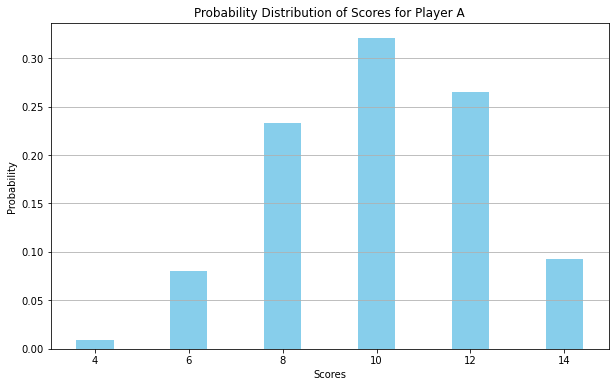

In [1]:
from itertools import product
import matplotlib.pyplot as plt
import random

outcomes = list(product(range(1, 7), repeat=5))

def score_for_A(rolls):
    score = 0
    position = 1
    primes = {2, 3, 5, 7}
    for roll in rolls:
        position += roll
        if position in primes:
            score += 2
        if position >= 9:
            score += 4
            position = 1
    return score

scores = [score_for_A(rolls) for rolls in outcomes]

score_counts = {}
for score in scores:
    if score in score_counts:
        score_counts[score] += 1
    else:
        score_counts[score] = 1

total_possibilities = len(outcomes)

score_probabilities = {score: count / total_possibilities for score, count in score_counts.items()}

print(score_probabilities)

plt.figure(figsize=(10, 6))
plt.bar(score_probabilities.keys(), score_probabilities.values(), color='skyblue')
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Probability Distribution of Scores for Player A')
plt.xticks(list(score_probabilities.keys()))
plt.grid(axis='y')
plt.show()


{6: 0.375, 8: 0.21875, 4: 0.15625, 12: 0.09375, 10: 0.15625}


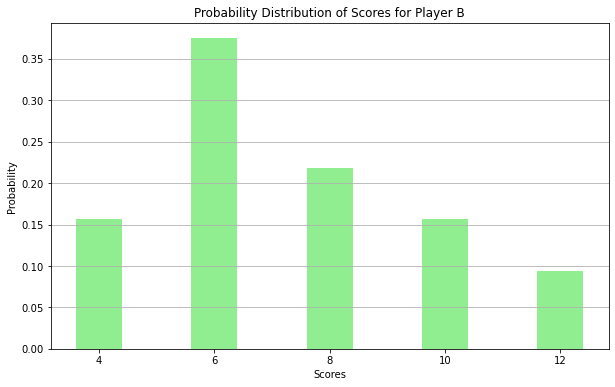

In [2]:

outcomes_B = list(product(range(2), repeat=5))

outcomes_B = [[flip + 1 for flip in outcome] for outcome in outcomes_B]

def score_for_B(flips):
    score = 0
    position = 1
    primes = {2, 3, 5, 7}
    for flip in flips:
        position += flip
        if position in primes:
            score += 2
        if position >= 9:
            score += 4
            position = 1
    return score

scores_B = [score_for_B(flips) for flips in outcomes_B]

score_counts_B = {}
for score in scores_B:
    if score in score_counts_B:
        score_counts_B[score] += 1
    else:
        score_counts_B[score] = 1

total_possibilities_B = len(outcomes_B)

score_probabilities_B = {score: count / total_possibilities_B for score, count in score_counts_B.items()}

print(score_probabilities_B)

plt.figure(figsize=(10, 6))
plt.bar(score_probabilities_B.keys(), score_probabilities_B.values(), color='lightgreen')
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Probability Distribution of Scores for Player B')
plt.xticks(list(score_probabilities_B.keys()))
plt.grid(axis='y')
plt.show()


In [3]:
def simulate_game():
    primes = {2, 3, 5, 7}
    
    def simulate_A():
        score, position = 0, 1
        for _ in range(5):
            roll = random.randint(1, 6)
            position += roll
            if position in primes:
                score += 2
            if position >= 9:
                score += 4
                position = 1
        return score
    
    def simulate_B():
        score, position = 0, 1
        for _ in range(5):
            flip = random.randint(1, 2)
            position += flip
            if position in primes:
                score += 2
            if position >= 9:
                score += 4
                position = 1
        return score

    score_A = simulate_A()
    score_B = simulate_B()
    
    if score_A > score_B:
        return 'A'
    elif score_B > score_A:
        return 'B'
    else:
        return 'Draw'

wins = {'A': 0, 'B': 0, 'Draw': 0}
for _ in range(1000000):
    result = simulate_game()
    wins[result] += 1

win_rates = {player: wins[player] / 1000000 for player in wins}

win_rates


{'A': 0.709102, 'B': 0.133533, 'Draw': 0.157365}

In [4]:

def simulate_game_10_rounds():
    primes = {2, 3, 5, 7}
    
    def simulate_A():
        score, position = 0, 1
        for _ in range(10):  
            roll = random.randint(1, 6)
            position += roll
            if position in primes:
                score += 2
            if position >= 9:
                score += 4
                position = 1
        return score
    
    def simulate_B():
        score, position = 0, 1
        for _ in range(10): 
            flip = random.randint(1, 2)
            position += flip
            if position in primes:
                score += 2
            if position >= 9:
                score += 4
                position = 1
        return score

    score_A = simulate_A()
    score_B = simulate_B()
    
    if score_A > score_B:
        return 'A'
    elif score_B > score_A:
        return 'B'
    else:
        return 'Draw'

wins_10_rounds = {'A': 0, 'B': 0, 'Draw': 0}
for _ in range(100000):
    result = simulate_game_10_rounds()
    wins_10_rounds[result] += 1

win_rates_10_rounds = {player: wins_10_rounds[player] / 100000 for player in wins_10_rounds}

win_rates_10_rounds


{'A': 0.85395, 'B': 0.06687, 'Draw': 0.07918}

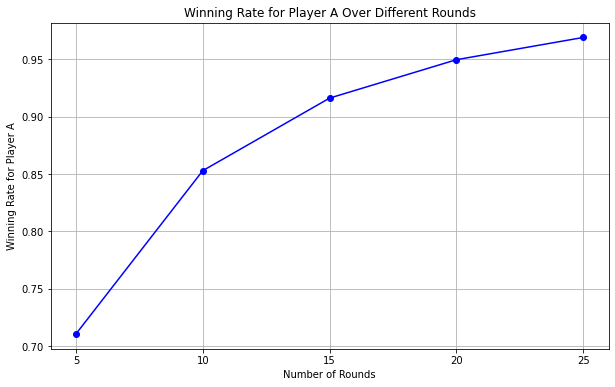

In [5]:
def simulate_game_rounds(n_rounds):
    primes = {2, 3, 5, 7}
    
    def simulate_A():
        score, position = 0, 1
        for _ in range(n_rounds):
            roll = random.randint(1, 6)
            position += roll
            if position in primes:
                score += 2
            if position >= 9:
                score += 4
                position = 1
        return score
    
    def simulate_B():
        score, position = 0, 1
        for _ in range(n_rounds):
            flip = random.randint(1, 2)
            position += flip
            if position in primes:
                score += 2
            if position >= 9:
                score += 4
                position = 1
        return score

    score_A = simulate_A()
    score_B = simulate_B()
    
    return 'A' if score_A > score_B else 'B' if score_B > score_A else 'Draw'

rounds = [5, 10, 15, 20, 25]
win_rates_A = []

for n_rounds in rounds:
    wins = {'A': 0, 'B': 0, 'Draw': 0}
    for _ in range(100000):
        result = simulate_game_rounds(n_rounds)
        wins[result] += 1
    win_rates_A.append(wins['A'] / 100000)

plt.figure(figsize=(10, 6))
plt.plot(rounds, win_rates_A, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Rounds')
plt.ylabel('Winning Rate for Player A')
plt.title('Winning Rate for Player A Over Different Rounds')
plt.xticks(rounds)
plt.grid(True)
plt.show()


In [6]:
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23]

def simulate_game():
    score_A, score_B = 0, 0
    position_A, position_B = 1, 1

    while score_A < 20 and score_B < 20:
        move_A = random.randint(1, 6)
        move_B = random.randint(1, 2)

        position_A += move_A
        position_B += move_B

        if position_A > 25:
            score_A += 4  
            position_A = 1
        if position_B > 25:
            score_B += 4  
            position_B = 1

        if position_A in primes:
            score_A += 2
        if position_B in primes:
            score_B += 2

    if score_A >= 20:
        return 'A'
    else:
        return 'B'

wins_A, wins_B = 0, 0
for _ in range(300000):
    winner = simulate_game()
    if winner == 'A':
        wins_A += 1
    else:
        wins_B += 1

prob_A = wins_A / 300000
prob_B = wins_B / 300000
(prob_A, prob_B)


(0.7437833333333334, 0.25621666666666665)

In [7]:
def simulate_game():
    primes = {2, 3, 5, 7}
    
    def simulate_A():
        score, position = 0, 1
        for _ in range(5):
            roll = random.randint(1, 6)
            position += roll
            if position in primes:
                score += 2
            if position >= 9:
                score += 2
                position = 1
        return score
    
    def simulate_B():
        score, position = 0, 1
        for _ in range(5):
            flip = random.randint(1, 2)
            position += flip
            if position in primes:
                score += 2
            if position >= 9:
                score += 2
                position = 1
        return score

    score_A = simulate_A()
    score_B = simulate_B()
    
    if score_A > score_B:
        return 'A'
    elif score_B > score_A:
        return 'B'
    else:
        return 'Draw'

wins = {'A': 0, 'B': 0, 'Draw': 0}
for _ in range(1000000):
    result = simulate_game()
    wins[result] += 1

win_rates = {player: wins[player] / 1000000 for player in wins}

win_rates



{'A': 0.470431, 'B': 0.251889, 'Draw': 0.27768}

In [8]:
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23]

def simulate_game():
    score_A, score_B = 0, 0
    position_A, position_B = 1, 1

    while score_A < 20 and score_B < 20:
        move_A = random.randint(1, 6)
        move_B = random.randint(1, 2)

        position_A += move_A
        position_B += move_B

        if position_A > 25:
            score_A += 2  
            position_A = 1
        if position_B > 25:
            score_B += 2  
            position_B = 1

        if position_A in primes:
            score_A += 2
        if position_B in primes:
            score_B += 2

    if score_A >= 20:
        return 'A'
    else:
        return 'B'

wins_A, wins_B = 0, 0
for _ in range(300000):
    winner = simulate_game()
    if winner == 'A':
        wins_A += 1
    else:
        wins_B += 1

prob_A = wins_A / 300000
prob_B = wins_B / 300000
(prob_A, prob_B)

(0.56795, 0.43205)

In [9]:
def simulate_game():
    primes = {2, 3, 5, 7}
    
    def simulate_A():
        score, position = 0, 1
        for _ in range(5):
            roll = random.randint(1, 6)
            position += roll
            if position in primes:
                score += 2
            if position >= 9:
                score += 1
                position = 1
        return score
    
    def simulate_B():
        score, position = 0, 1
        for _ in range(5):
            flip = random.randint(1, 2)
            position += flip
            if position in primes:
                score += 2
            if position >= 9:
                score += 1
                position = 1
        return score

    score_A = simulate_A()
    score_B = simulate_B()
    
    if score_A > score_B:
        return 'A'
    elif score_B > score_A:
        return 'B'
    else:
        return 'Draw'

wins = {'A': 0, 'B': 0, 'Draw': 0}
for _ in range(1000000):
    result = simulate_game()
    wins[result] += 1

win_rates = {player: wins[player] / 1000000 for player in wins}

win_rates


{'A': 0.377595, 'B': 0.467419, 'Draw': 0.154986}

In [10]:
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23]

def simulate_game():
    score_A, score_B = 0, 0
    position_A, position_B = 1, 1

    while score_A < 20 and score_B < 20:
        move_A = random.randint(1, 6)
        move_B = random.randint(1, 2)

        position_A += move_A
        position_B += move_B

        if position_A > 25:
            score_A += 1  
            position_A = 1
        if position_B > 25:
            score_B += 1  
            position_B = 1

        if position_A in primes:
            score_A += 2
        if position_B in primes:
            score_B += 2

    if score_A >= 20:
        return 'A'
    else:
        return 'B'

wins_A, wins_B = 0, 0
for _ in range(300000):
    winner = simulate_game()
    if winner == 'A':
        wins_A += 1
    else:
        wins_B += 1

prob_A = wins_A / 300000
prob_B = wins_B / 300000
(prob_A, prob_B)

(0.4979866666666667, 0.5020133333333333)